**MNIST Digit Classification with Neural Network**

Importing the Dependencies

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3) # only to get common result. 
from tensorflow import keras
from keras.datasets import mnist # Datasets
from tensorflow.math import confusion_matrix


Loading the MNIST data from keras.datasets

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
type(X_test)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Traning Data = 60K images
Testing Data = 10K images
Image Dimesion --> 28*28
Grayscale Image --> 1 Channel

In [9]:
# printing the 10th image
print(X_train[10].shape)

(28, 28)


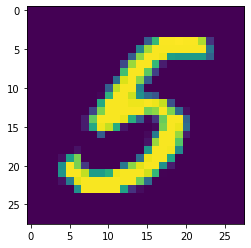

In [11]:
# Displaying the image
plt.imshow(X_train[845])
plt.show()

Image Labels

In [13]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also applu One Hot encoding
All the image have the same dimesions in this datasets, If not, we have to resize all the images to a common dimesion

In [14]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

Building the Neural Network

In [16]:
# setting up the layers of the Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)), # We can't feed data directly,
                          keras.layers.Dense(50, activation='relu'), # Values of some netrons are 1 and other are 0,
                          keras.layers.Dense(50, activation='relu'), # Values of some netrons are 1 and other are 0,
                          keras.layers.Dense(10, activation='sigmoid'), # Values of some netrons are 1 and other are 0,
])  

In [17]:
# compiling the model

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [21]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0302 - accuracy: 0.9901
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0224 - accuracy: 0.9926
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9919
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0214 - accuracy: 0.9933
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0184 - accuracy: 0.9937
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0163 - accuracy: 0.9945
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0163 - accuracy: 0.9943
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.013

Trainig data accuracy = 99.66%
Accuracy on Test Data:

In [25]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1562 - accuracy: 0.9730


In [26]:
print(accuracy, loss)

0.9729999899864197 0.15617536008358002


In [27]:
print(X_test.shape)

(10000, 28, 28)


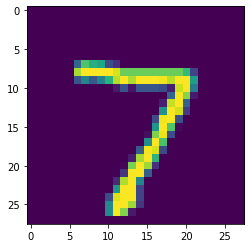

In [28]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [29]:
print(Y_test[0])

7


In [30]:
Y_pred = model.predict(X_test)

In [31]:
print(Y_pred.shape)

(10000, 10)


In [32]:
print(Y_pred[0])

[9.4143081e-07 2.0823500e-01 6.4652503e-02 8.0831158e-01 5.5843632e-08
 2.0583133e-07 2.2332078e-17 1.0000000e+00 4.3784212e-06 9.6331263e-01]


model.predict() gives the prediction of each class for that point

In [34]:
# converting the prediction probalities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [36]:
# converting the prediction probalities to class label for all test data points
Y_pred_labels = [np.argmax(i)  for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 6, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 6, 0, 7, 1, 1, 2, 1, 

Y_test --> True Labels
Y_pred_labels --> Predicted Labels

Confusion Matrix

In [40]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [41]:
print(conf_mat)

tf.Tensor(
[[ 965    1    2    2    1    1    2    0    1    5]
 [   0 1120    2    2    1    2    2    0    5    1]
 [   2    7 1000    4    3    0    3    6    5    2]
 [   0    0    5  988    0    5    2    2    1    7]
 [   1    1    1    0  963    0    4    1    1   10]
 [   1    0    0   49    2  825    5    1    4    5]
 [   4    2    1    1    7   14  928    0    1    0]
 [   1    2   14    3    0    0    0  988    1   19]
 [   4    0    9    9    5    6   10    1  924    6]
 [   1    1    1    9   20    4    1    1    2  969]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Label')

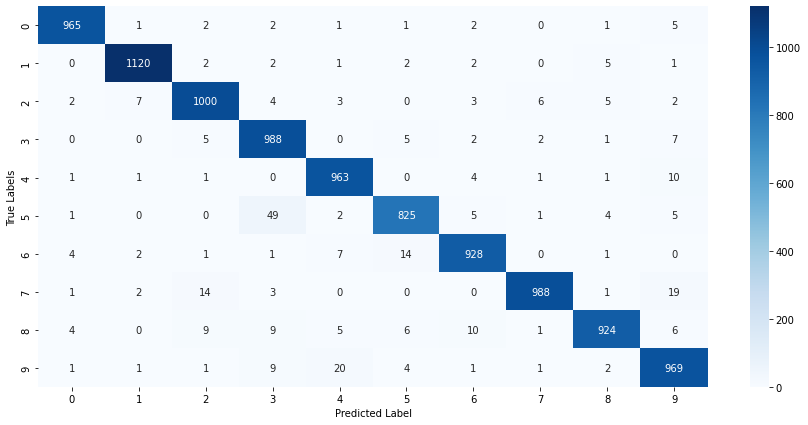

In [44]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Label')

Building a Predictive System

In [46]:
input_image_path = '/content/image.jpg'
input_image = cv2.imread(input_image_path)

In [ ]:
print(input_image)

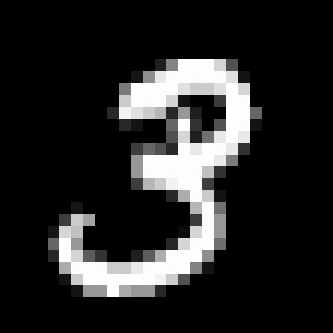

In [48]:
cv2_imshow(input_image)

In [49]:
input_image.shape

(333, 333, 3)

In [50]:
greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [52]:
greyscale.shape

(333, 333)

In [53]:
input_image_resize = cv2.resize(greyscale, (28, 28))

In [54]:
input_image_resize.shape

(28, 28)

In [55]:
cv2_imshow(input_image_resize)

In [56]:
input_image_resize = input_image_resize/255

In [57]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [58]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

[[6.6316752e-22 2.1953642e-02 4.9306191e-06 1.0000000e+00 4.1118589e-12
  8.0993509e-01 7.6272658e-25 1.6574783e-10 6.2812716e-01 9.9999809e-01]]


In [59]:
input_pred_label = np.argmax(input_prediction)

In [60]:
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted: /content/image.jpg


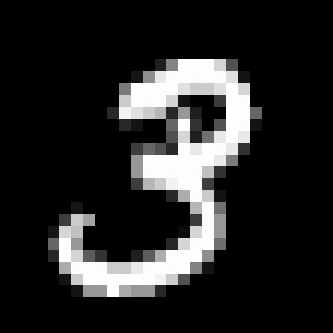

The Handwritten Digit is recongnized as  3


In [61]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(greyscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recongnized as ', input_pred_label)